# Module 5 Bayesian Inference

In [32]:
import numpy as np
import pandas as pd

x = np.linspace(-5, 5, 20)
y = -5 + 3*x + 4*np.random.normal(size=x.shape)
data = pd.DataFrame({'x': x, 'y': y})

In [33]:
import pymc3 as pm

with pm.Model():
    
    # prior info
    intercept = pm.Uniform('intercept',-10,10)
    slope = pm.Uniform('slope',1,3)
    
    # likelihood
    obs = pm.Normal('y', 
                   mu = intercept+slope*x,
                   sd = 1,
                   observed = y)
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:09<00:00, 4263.31draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1384a2be0>,
      dtype=object)

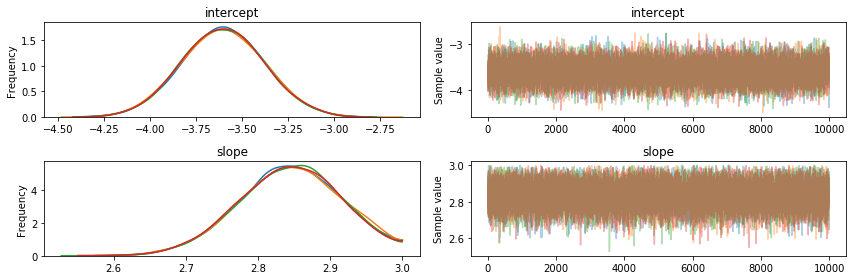

In [34]:
pm.traceplot(trace)

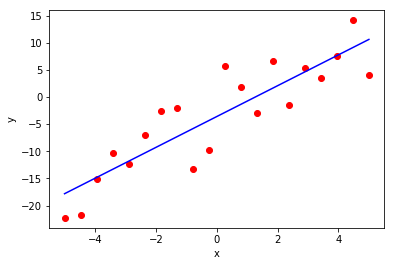

In [35]:
a = trace['intercept'].mean()
b = trace['slope'].mean()

yhat = a + b*x

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y,'or')
plt.plot(x,yhat,'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Ex: Bayes' Inference

In [36]:
import pandas as pd
mtcars = pd.read_csv('./data/mtcars.csv')

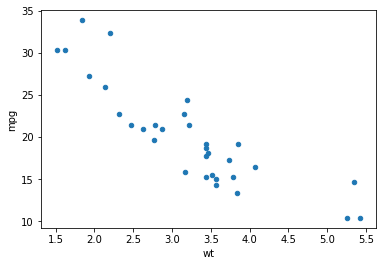

In [37]:
mtcars.plot.scatter('wt','mpg')

In [26]:
with pm.Model():
    intercept = pm.Uniform('intercept',30,40)
    slope = pm.Uniform('slope',-10,-2)
    
    mpg_ = pm.Normal('mpg_',
                       mu = intercept + slope*mtcars.wt,
                       sd = 1,
                       observed = mtcars.mpg)
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:14<00:00, 2868.17draws/s]
The acceptance probability does not match the target. It is 0.8809425035945576, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130741278>,
      dtype=object)

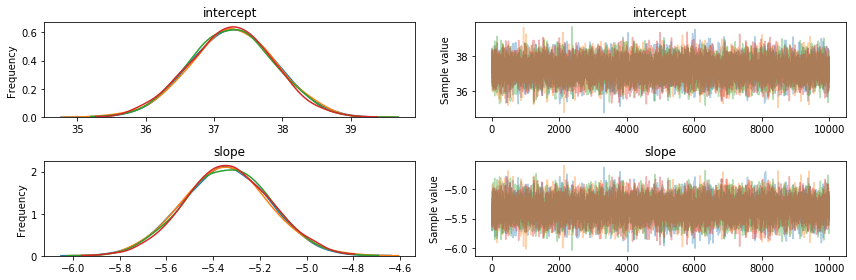

In [27]:
pm.traceplot(trace)

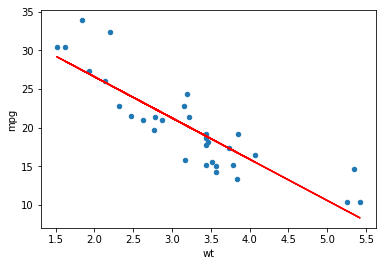

In [28]:
a = trace['intercept'].mean()
b = trace['slope'].mean()

yhat = a + b*mtcars.wt
mtcars.plot.scatter('wt','mpg')
plt.plot(mtcars.wt,yhat,'r')